<a href="https://colab.research.google.com/github/gyrsh/Machine_Learning/blob/master/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
((x_train,y_train),(x_test,y_test))=imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [4]:
len(x_train)

25000

In [5]:
len(x_test)

25000

In [6]:
word_index=imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
index_word=dict((value,key) for (key,value) in word_index.items())

In [0]:
actual_review=' '.join([index_word.get(idx-3,'?') for idx in x_train[0]])

In [9]:
actual_review

"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

In [0]:
import numpy as np

In [0]:
def vectorise(sentence,dim=1000):
  output=np.zeros((len(sentence),dim))
  for i,idx in enumerate(sentence):
    output[i,idx]=1
  return output

In [0]:
X_train=vectorise(x_train)


In [0]:
X_test=vectorise(x_test)

In [14]:
X_train.shape

(25000, 1000)

In [15]:
X_test.shape

(25000, 1000)

In [0]:
#X_train[0]

In [0]:
Y_train=np.asarray(y_train).astype('float32')

In [0]:
Y_test=np.asarray(y_test).astype('float32')

In [0]:
from keras.layers import Dense
from keras import models

In [20]:
#define the model
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(1000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
#compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


Training and Validation

In [0]:
x_val=X_train[:5000]
x_train_new=X_train[5000:]

y_val=Y_train[:5000]
y_train_new=Y_train[5000:]

In [24]:
val=model.fit(x_train_new,y_train_new,epochs=2,batch_size=128,validation_data=(x_val,y_val))


Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 5s 247us/step - loss: 0.4734 - acc: 0.7845 - val_loss: 0.3610 - val_acc: 0.8454
Epoch 2/2
20000/20000 [==============================] - 1s 38us/step - loss: 0.3326 - acc: 0.8612 - val_loss: 0.3411 - val_acc: 0.8556


Visualise the results

In [0]:
import matplotlib.pyplot as plt

In [0]:
h=val.history

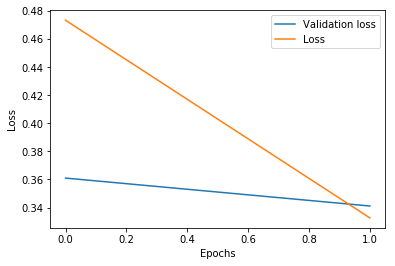

In [27]:
plt.plot(h['val_loss'],label="Validation loss")
plt.plot(h['loss'],label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

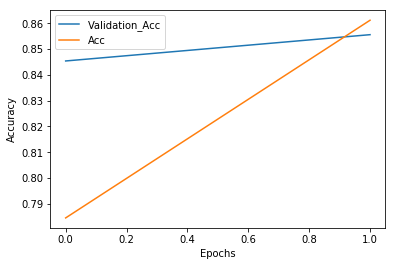

In [28]:
plt.plot(h['val_acc'],label="Validation_Acc")
plt.plot(h['acc'],label="Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 1s 45us/step


0.85876

In [30]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 1s 45us/step


0.87184

In [31]:
model.predict(X_test)

array([[0.25082168],
       [0.984504  ],
       [0.5521361 ],
       ...,
       [0.07380977],
       [0.0935775 ],
       [0.31167543]], dtype=float32)